\subsection*{ЗАДАЧА О МАКСИМАЛЬНОМ ПАРОСОЧЕТАНИИ
И ЗАДАЧА О НАЗНАЧЕНИЯХ}

\subsubsection*{Задача о максимальном паросочетании}

Задача звучит следующим образом: найдите максимальное паросочетание и минимальное вершинное
покрытие в двудольном графе.
Сочетанием простого графа называется его подмножество рёбер, никакие два
из которых не имеют общей вершины.
Задача о максимальном паросочетании заключается в нахождении по
данному графу сочетания максимального размера.

Максимальное паросочетание: {0: 6, 1: 9, 2: 10, 3: 11, 4: 8, 5: 7, 6: 0, 7: 5, 8: 4, 9: 1, 10: 2, 11: 3}
Минимальное вершинное покрытие: {0, 1, 2, 3, 4, 5}


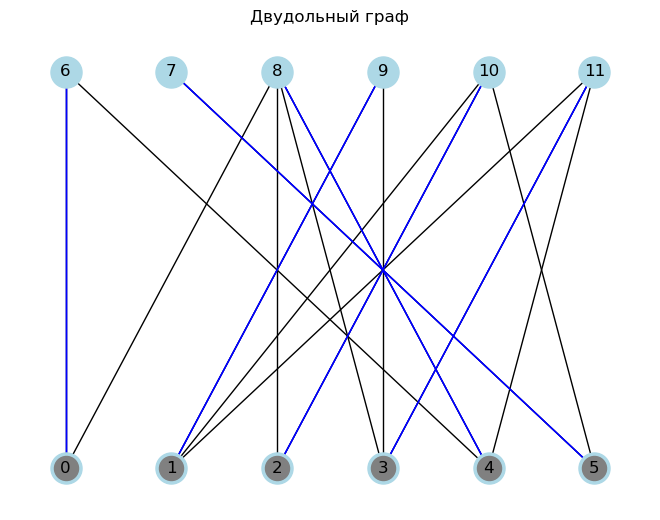

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([0, 1, 2, 3, 4, 5], bipartite=0)  
G.add_nodes_from([6, 7, 8, 9, 10, 11], bipartite=1)  

edges = [(0, 6), (0, 8), (1, 9), (1, 11), (1, 10), (2, 8), (2, 10), (3, 8), (3, 9), (3, 11), (4, 6), (4, 8), (4, 11), (5, 7), (5, 10)]
G.add_edges_from(edges)

matching = nx.bipartite.maximum_matching(G)

vertex_cover = nx.bipartite.to_vertex_cover(G, matching)

print(f"Максимальное паросочетание: {matching}")
print(f"Минимальное вершинное покрытие: {vertex_cover}")

pos = nx.bipartite_layout(G, [0, 1, 2, 3, 4, 5], align='horizontal')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')

max_matching_edges = [(u, v) for u, v in matching.items()]
nx.draw_networkx_edges(G, pos, edgelist=max_matching_edges, edge_color='blue')

nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover, node_color='grey')

plt.title("Двудольный граф")
plt.show()

Максимальное паросочетание в нашем графе следующее $M = {{0, 6}, {1, 9}, {2, 10}, {3, 11}, {4, 8}, {5, 7}}$ эти ребра обозначены синим цветом на графе выше.
Минимальное вершинное покрытие: ${0, 1, 2, 3, 4, 5}$.

\subsubsection*{Задача о значениях}

Для $n$ работников и работ, дана матрица $n × n$, задающая стоимость выполнения каждой
работы каждым работником. Найти минимальную стоимость выполнения работ, такую что
каждый работник выполняет ровно одну работу, а каждую работу выполняет ровно один
работник. Т.е. произвести назначение $(assignment)$ работника на работу.
Назначение можно задать биекцией между двумя конечными множествами из $n$ элементов,
которая задается перестановкой $(p_1, p_2, . . . , p_n).$ 

In [3]:
import scipy

cost = [[4, 5, 2, 1, 5],
        [5, 3, 5, 2, 3],
        [1, 2, 2, 3, 2],
        [4, 4, 1, 4, 3],
        [1, 1, 3, 1, 1]]

row_ind, col_ind = scipy.optimize.linear_sum_assignment(cost)

for row, col in zip(row_ind, col_ind):
    print(f"Строка {row+1} назначена столбцу {col+1}")

total_cost = sum(cost[row][col] for row, col in zip(row_ind, col_ind))

Строка 1 назначена столбцу 4
Строка 2 назначена столбцу 2
Строка 3 назначена столбцу 1
Строка 4 назначена столбцу 3
Строка 5 назначена столбцу 5


Получаем назначение минимальной стоимости.

То есть ответом является (4, 2, 1, 3, 5).